# 📦 ML-->Unsupervised --> Clustering 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
import pyreadr
import pandas as pd 
df = pd.read_csv("penguins.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [4]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [6]:
df= df.dropna()
df = df[df['sex'] != '.']

In [7]:
df = df[(df['flipper_length_mm'] >= 150) & (df['flipper_length_mm'] <= 250)]

In [8]:
df['sex'] = df['sex'].map({'MALE': 1, 'FEMALE': 0})

In [9]:
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
X = df[features]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 15.6 KB


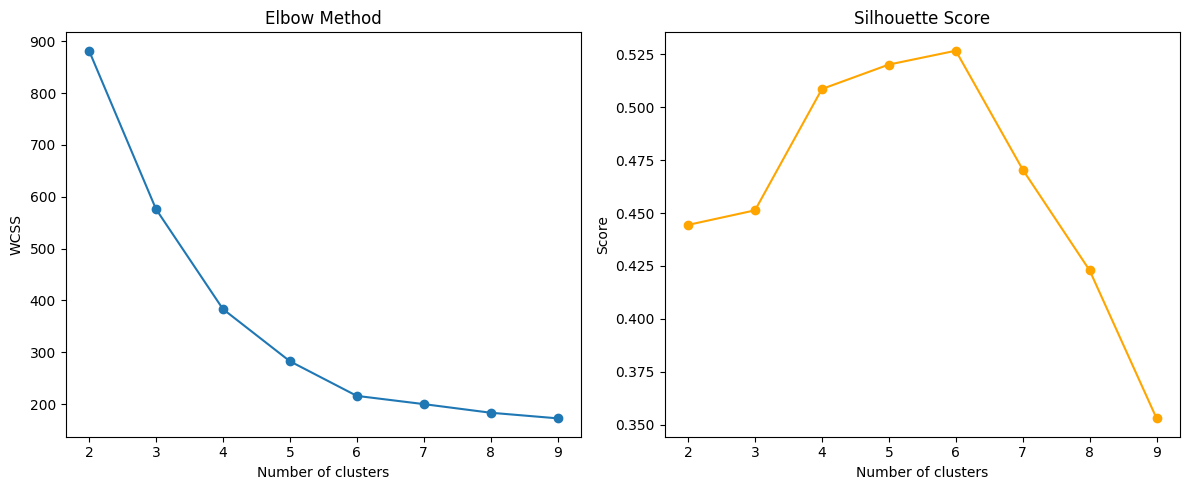

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

wcss = []
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.tight_layout()
plt.show()

In [13]:
wcss

[881.8305702961086,
 576.2691239087542,
 383.4643203353644,
 282.84171477880295,
 216.0007871462563,
 200.1370509735397,
 183.48810117222354,
 172.66890458160557]

In [19]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df['cluster'] = clusters
clusters

array([3, 4, 4, 4, 3, 4, 3, 4, 3, 4, 4, 3, 4, 5, 4, 3, 4, 3, 3, 4, 3, 4,
       4, 3, 4, 3, 4, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 3, 4, 3, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 3, 4, 3, 4, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 3, 4, 4, 3, 4, 3, 0, 5, 5, 0, 5, 0, 0, 5, 0,
       5, 0, 5, 0, 5, 0, 5, 5, 0, 0, 5, 4, 5, 4, 5, 0, 5, 0, 5, 0, 5, 4,
       5, 4, 5, 5, 0, 0, 5, 0, 5, 5, 0, 5, 0, 0, 5, 0, 5, 5, 0, 0, 5, 0,
       5, 4, 5, 0, 5, 5, 0, 5, 0, 0, 5, 0, 5, 5, 0, 2, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,

In [20]:
df['cluster'] = clusters
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,39.1,18.7,181.0,3750.0,1,3
1,39.5,17.4,186.0,3800.0,0,4
2,40.3,18.0,195.0,3250.0,0,4
4,36.7,19.3,193.0,3450.0,0,4
5,39.3,20.6,190.0,3650.0,1,3
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,2
340,46.8,14.3,215.0,4850.0,0,2
341,50.4,15.7,222.0,5750.0,1,1
342,45.2,14.8,212.0,5200.0,0,2


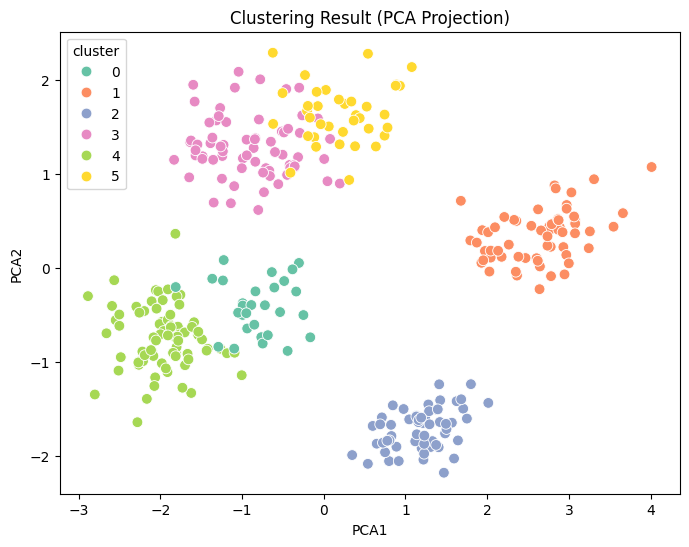

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# PCA ga o‘tkazish (2 komponenta)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# DataFrame ga PCA natijalarini qo‘shish
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Vizualizatsiya
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster', palette='Set2', s=60)
plt.title('Clustering Result (PCA Projection)')
plt.show()


In [23]:
cluster_summary = df.groupby('cluster')[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']].mean().round(2)
print(cluster_summary)

         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
cluster                                                                      
0                   47.31            17.71             192.76      3569.83   
1                   49.47            15.72             221.54      5484.84   
2                   45.56            14.24             212.71      4679.74   
3                   40.26            19.03             191.99      4035.14   
4                   37.58            17.58             187.67      3363.14   
5                   50.62            19.27             199.95      3953.38   

         sex  
cluster       
0        0.0  
1        1.0  
2        0.0  
3        1.0  
4        0.0  
5        1.0  


In [24]:
df.columns.tolist()

['culmen_length_mm',
 'culmen_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex',
 'cluster',
 'PCA1',
 'PCA2']

In [25]:
x = df[['culmen_length_mm', 'body_mass_g']]
y = df['cluster'] 

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
y = kmeans.fit_predict(x)


In [29]:
from sklearn.metrics import silhouette_score

for k in [4, 5]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x)
    score = silhouette_score(x, labels)
    print(f"Silhouette Score for k={k}: {score:.3f}")


Silhouette Score for k=4: 0.553
Silhouette Score for k=5: 0.525


In [30]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)


y = kmeans.fit_predict(x)

In [31]:
print(y)

[2 2 0 0 0 0 3 0 2 2 0 3 0 2 0 0 2 2 2 2 0 0 0 2 0 2 0 2 0 2 2 0 0 3 0 2 0
 3 0 3 0 0 2 0 2 0 2 0 2 0 2 0 2 0 3 0 2 0 2 0 2 0 3 0 2 0 2 2 2 2 2 0 2 0
 3 2 2 0 0 2 0 2 0 0 2 0 3 0 2 2 3 0 2 2 3 0 2 0 0 2 2 0 3 2 3 0 2 2 2 0 2
 0 0 0 0 0 2 0 2 0 2 0 2 0 0 0 3 0 2 0 2 0 2 0 0 0 2 0 0 2 0 0 2 2 2 0 2 0
 0 2 2 0 2 2 2 2 2 2 2 0 2 0 2 0 3 0 0 0 2 0 2 0 2 2 3 0 2 0 2 0 2 2 3 0 3
 2 0 0 0 2 3 0 2 0 2 0 2 0 2 0 0 0 2 2 0 2 0 0 2 0 2 2 2 3 1 3 1 1 3 3 1 3
 1 3 1 3 1 2 1 2 1 3 1 1 3 3 3 3 3 1 3 1 1 3 3 1 1 1 3 1 3 1 2 1 2 3 1 3 2
 1 3 1 3 1 3 3 3 3 2 3 3 1 2 1 3 1 3 1 1 3 1 3 3 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 3 3 1 3 1 3 1 1 3 1 3 1 3 1 3 1 3 1 1 3 3 1 1 1]


In [37]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# CSV faylni o‘qish
df = pd.read_csv("penguins.csv")

# Faqat sonli ustunlar
X = df.select_dtypes(include='number')

# NaN qiymatlarni to‘ldirish
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# KMeans modelini yaratish va o‘rgatish
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_imputed)

# Har bir klasterni alohida CSV faylga saqlash
for cluster_num in range(5):
    cluster_df = df[df['cluster'] == cluster_num]
    filename = f'cluster_{cluster_num + 1}_penguins.csv'
    cluster_df.to_csv(filename, index=False)


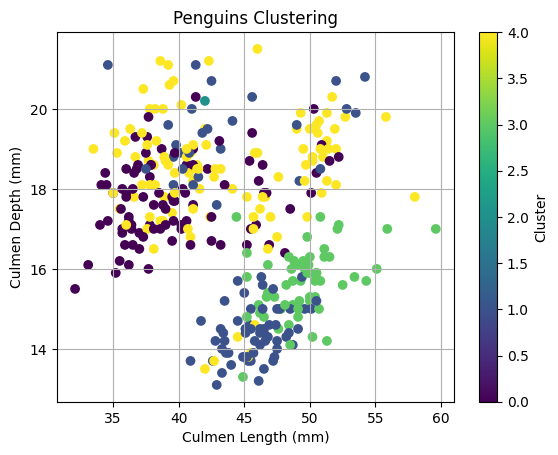

In [38]:
plt.scatter(df['culmen_length_mm'], df['culmen_depth_mm'], c=df['cluster'], cmap='viridis')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Penguins Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


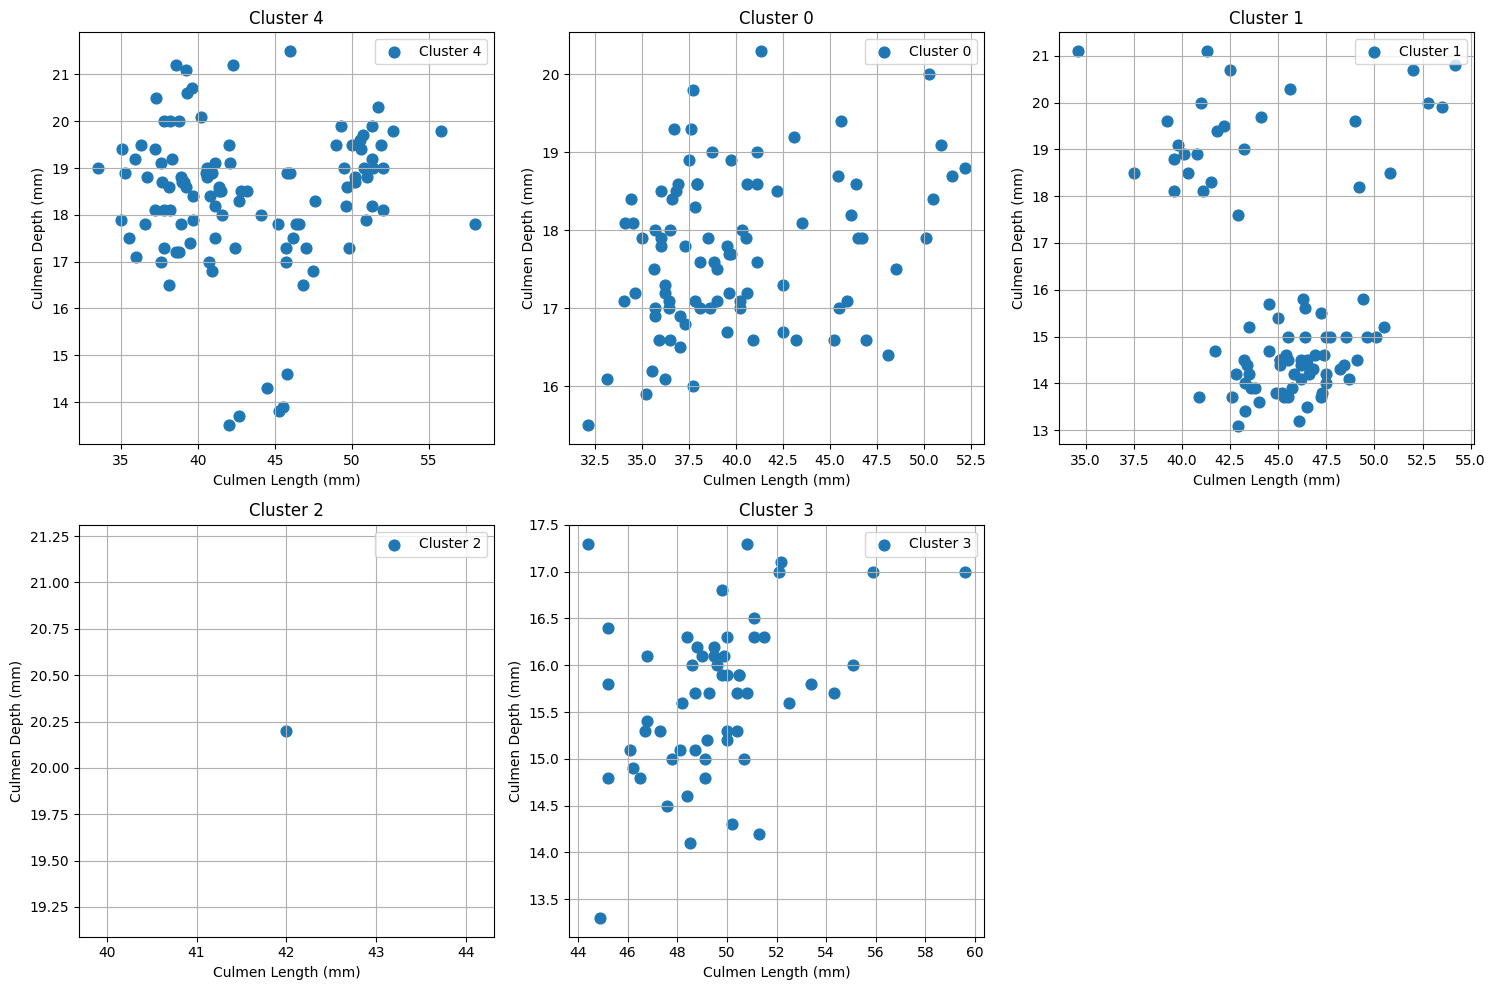

In [41]:
import matplotlib.pyplot as plt

unique_clusters = df['cluster'].unique()

plt.figure(figsize=(15, 10))

for i, cluster in enumerate(unique_clusters):
    plt.subplot(2, 3, i+1)
    cluster_df = df[df['cluster'] == cluster]
    plt.scatter(cluster_df['culmen_length_mm'],
                cluster_df['culmen_depth_mm'],
                s=60,
                label=f"Cluster {cluster}")
    plt.title(f"Cluster {cluster}")
    plt.xlabel("Culmen Length (mm)")
    plt.ylabel("Culmen Depth (mm)")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


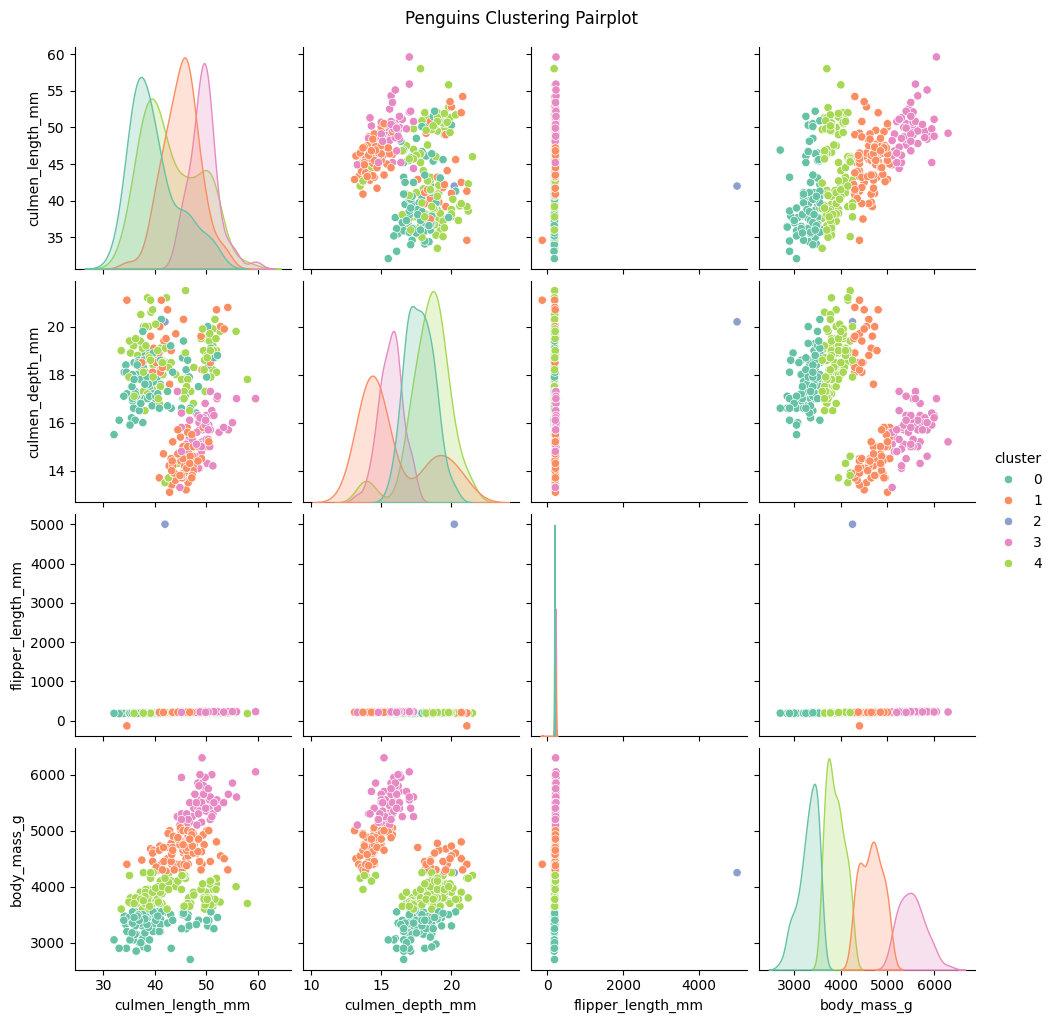

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df,
             hue='cluster',  # to‘g‘ri ustun nomi
             vars=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'],
             palette='Set2')

plt.suptitle("Penguins Clustering Pairplot", y=1.02)
plt.show()
